# **Perceptron**
____

This notebook implements the Perceptron algorithm to classify weather conditions in Texas, specifically focusing on identifying extreme weather events. We'll explore both single-layer and multi-layer perceptron approaches.

## **Overview**
The Perceptron is one of the simplest forms of artificial neural networks. In this notebook, we'll:
1. Implement a single-layer perceptron for binary classification
2. Create a multi-layer perceptron (MLP) for more complex pattern recognition
3. Compare their performances on weather classification
4. Analyze the impact of different architectures


## **Required Libraries**
We'll use the following libraries:
- `numpy` and `pandas` for data manipulation
- `matplotlib` and `seaborn` for visualization
- `sklearn` for machine learning implementations
- `MLPClassifier` for multi-layer perceptron
- `Perceptron` for single-layer perceptron

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance

______
## **Data Loading and Preprocessing**
We'll work with weather data from Texas, focusing on the following features:
- Maximum temperature
- Minimum temperature
- Humidity
- Wind speed
- Precipitation
- Pressure

Our target variable will be a binary classification indicating whether a day is considered extreme (high temperature or heavy precipitation) or normal.

In [25]:
# Load the weather data
df = pd.read_csv('../../weather_data.csv')

# Define features for classification
features = [
    'max_temp',
    'min_temp',
    'humidity',
    'wind_speed',
    'precipitation',
    'pressure'
]

# Create target variable (1 for extreme weather days, 0 for normal days)
df['is_extreme'] = ((df['max_temp'] >= 95) | (df['precipitation'] >= 2.0)).astype(int)

# Split features and target
X = df[features].values
y = df['is_extreme'].values

______
## **Exploratory Data Analysis**
Let's visualize our data to understand:
1. Feature correlations through a heatmap
2. Distribution of extreme vs normal days
3. Relationship between key features (temperature and humidity)

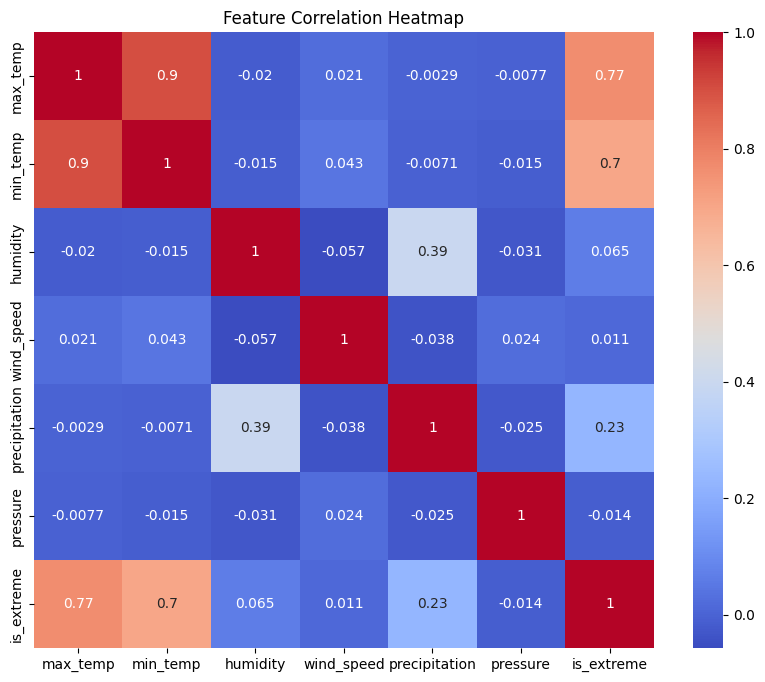

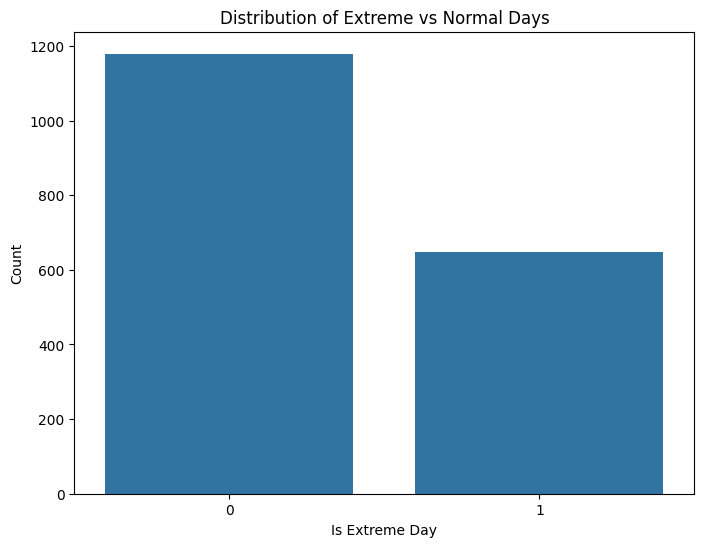

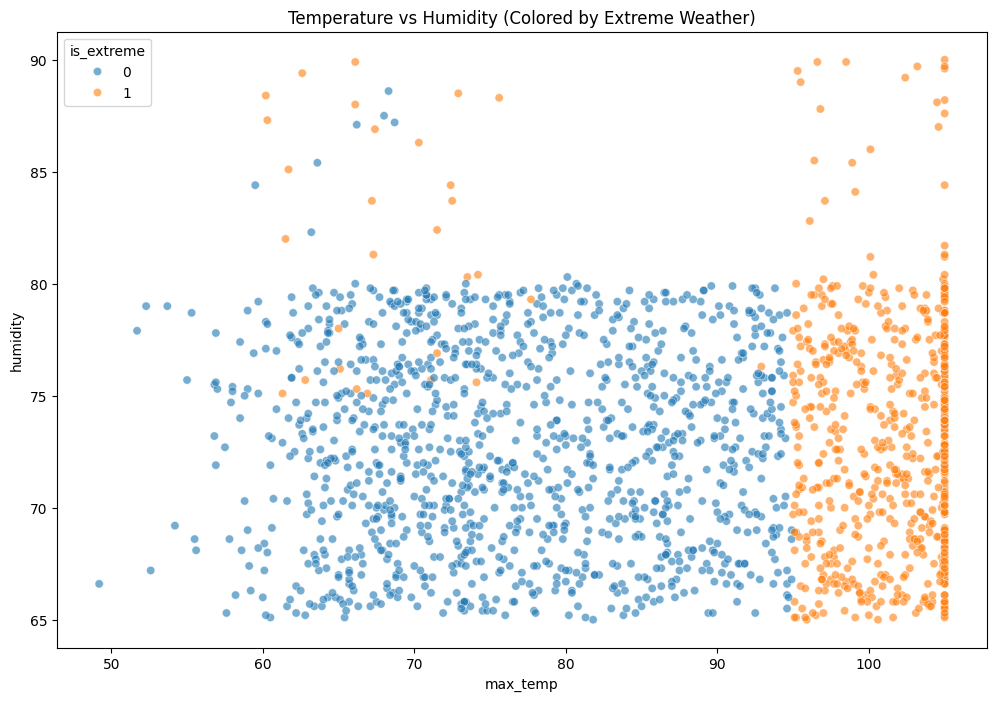

In [26]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(df[features + ['is_extreme']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Plot distribution of target variable
plt.figure(figsize=(8, 6))
sb.countplot(data=df, x='is_extreme')
plt.title('Distribution of Extreme vs Normal Days')
plt.xlabel('Is Extreme Day')
plt.ylabel('Count')
plt.show()

# Create scatter plots for feature pairs
plt.figure(figsize=(12, 8))
sb.scatterplot(data=df, x='max_temp', y='humidity', hue='is_extreme', alpha=0.6)
plt.title('Temperature vs Humidity (Colored by Extreme Weather)')
plt.show()

_____
## **Single-Layer Perceptron**
The single-layer perceptron is the simplest form of neural network. It:
1. Takes input features
2. Applies weights and bias
3. Uses an activation function (step function) to make binary predictions

We'll implement this to establish a baseline for our classification task.

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       238
           1       0.95      0.89      0.92       128

    accuracy                           0.95       366
   macro avg       0.95      0.93      0.94       366
weighted avg       0.95      0.95      0.94       366



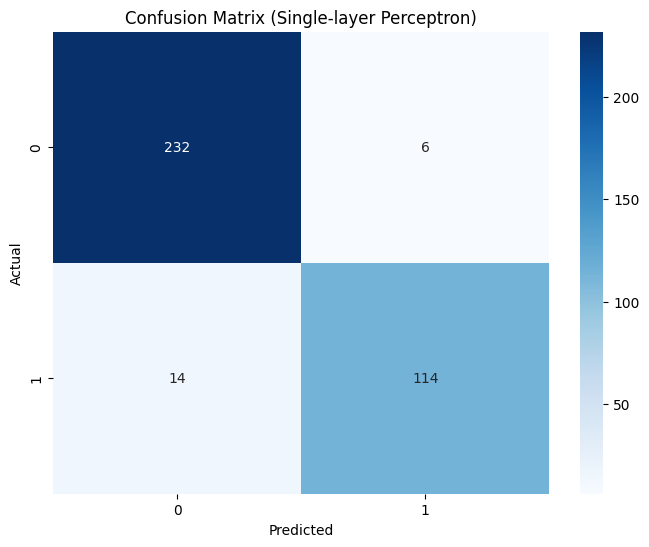

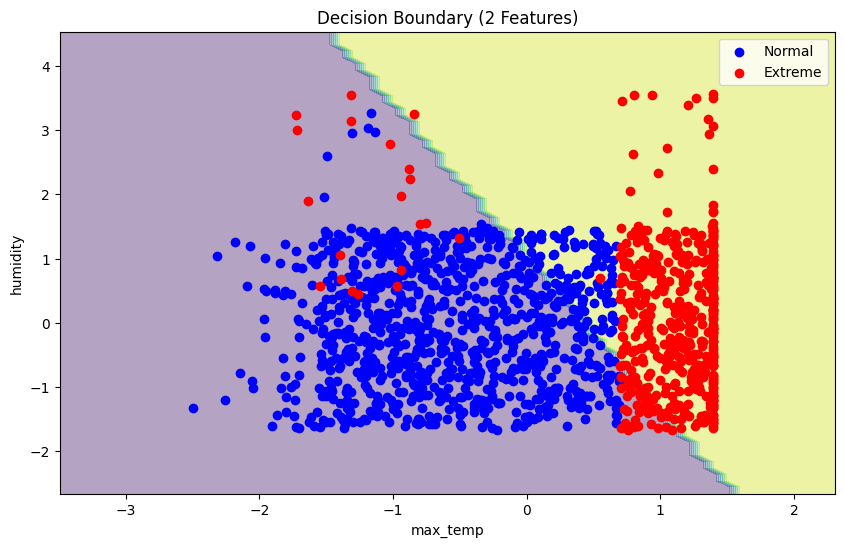

In [27]:
# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train single-layer perceptron
perceptron = Perceptron(random_state=42, max_iter=1000)
perceptron.fit(X_train_scaled, y_train)

# Make prediction
y_pred = perceptron.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Single-layer Perceptron)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot decision boundary for two selected features
def plot_decision_boundary(X, y, model, feature1, feature2, feature_names):
    # Only use 2 features
    X_2d = X[:, [feature1, feature2]]
    
    # Fit model to 2D data if not already
    model.fit(X_2d, y)

    # Create a grid of points
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_2d[y == 0][:, 0], X_2d[y == 0][:, 1], c='blue', label='Normal')
    plt.scatter(X_2d[y == 1][:, 0], X_2d[y == 1][:, 1], c='red', label='Extreme')
    plt.xlabel(feature_names[feature1])
    plt.ylabel(feature_names[feature2])
    plt.title('Decision Boundary (2 Features)')
    plt.legend()
    plt.show()


plot_decision_boundary(X_train_scaled, y_train, Perceptron(max_iter=1000, random_state=42), 
                       feature1=0, feature2=2, feature_names=features)


______
## **Multi-Layer Perceptron (MLP)**
The multi-layer perceptron is a more sophisticated neural network that:
1. Contains multiple layers of neurons
2. Uses non-linear activation functions
3. Can learn more complex patterns through backpropagation

We'll implement an MLP with two hidden layers to potentially improve our classification performance.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.99      0.99      0.99       128

    accuracy                           0.99       366
   macro avg       0.99      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



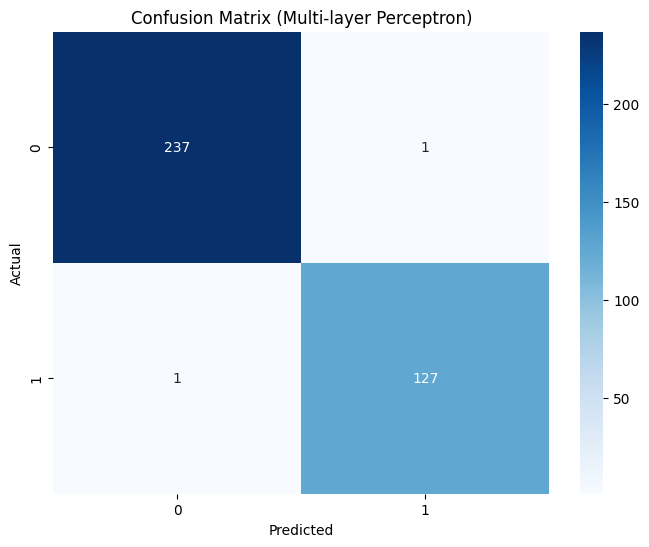

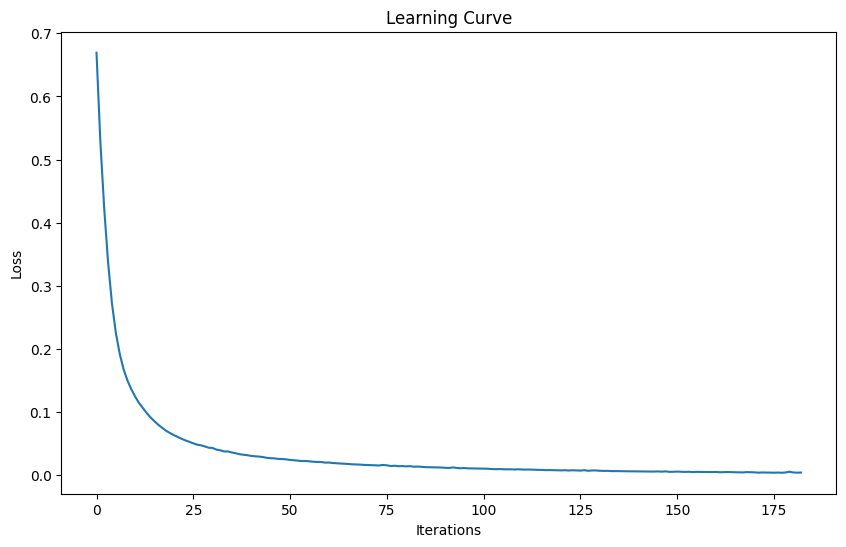

In [28]:
# Train multi-layer perceptron
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred_mlp))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sb.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Multi-layer Perceptron)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

_____
## **Model Comparison**
Let's compare the performance of both models using:
1. Cross-validation scores for robust evaluation
2. ROC curves to visualize classification performance
3. Confusion matrices to understand prediction patterns


Single-layer Perceptron Cross-validation scores: [0.94863014 0.95890411 0.97260274 0.92808219 0.97260274]
Single-layer Perceptron Average CV score: 0.956 (+/- 0.033)

Multi-layer Perceptron Cross-validation scores: [0.98972603 0.98972603 0.9760274  0.98972603 0.98287671]
Multi-layer Perceptron Average CV score: 0.986 (+/- 0.011)


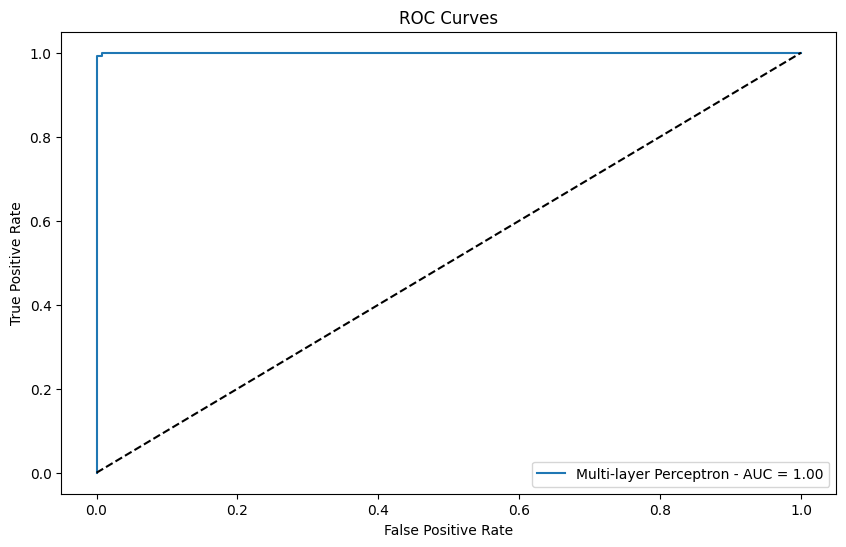

In [29]:
# Compare model performances
models = {
    'Single-layer Perceptron': perceptron,
    'Multi-layer Perceptron': mlp
}

# Perform cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f'\n{name} Cross-validation scores:', scores)
    print(f'{name} Average CV score: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

# Plot ROC curves for both models
plt.figure(figsize=(10, 6))

# Single-layer Perceptron ROC curve
y_pred_proba = mlp.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Multi-layer Perceptron - AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

_____
## **Feature Importance Analysis**
Understanding which features contribute most to the model's predictions is crucial. We'll:
1. Use permutation importance to measure feature impact
2. Visualize feature importance scores
3. Analyze which weather conditions are most indicative of extreme events

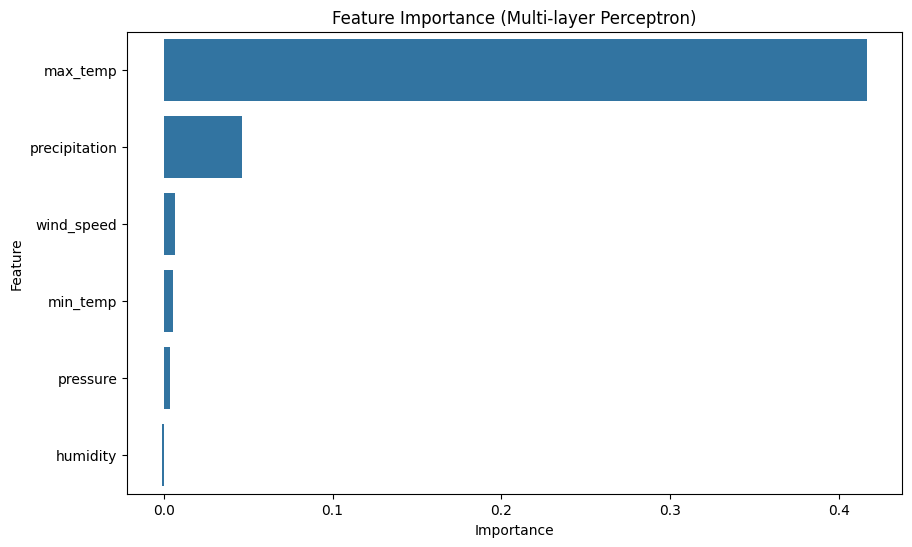


Feature Importance:
         feature  importance       std
0       max_temp    0.416667  0.032033
4  precipitation    0.046175  0.004803
3     wind_speed    0.006557  0.003042
1       min_temp    0.005464  0.004233
5       pressure    0.003552  0.003244
2       humidity   -0.000820  0.003005


In [30]:
# Calculate feature importance using permutation importance
result = permutation_importance(mlp, X_test_scaled, y_test, n_repeats=10,
                              random_state=42, n_jobs=4)

importance_df = pd.DataFrame({
    'feature': features,
    'importance': result.importances_mean,
    'std': result.importances_std
})
importance_df = importance_df.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sb.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importance (Multi-layer Perceptron)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print feature importance values
print("\nFeature Importance:")
print(importance_df)

_____
## **Neural Network Architecture Analysis**
The performance of neural networks heavily depends on their architecture. We'll:
1. Test different network configurations
2. Compare their performance metrics
3. Identify the optimal architecture for our weather classification task

<Figure size 1200x600 with 0 Axes>

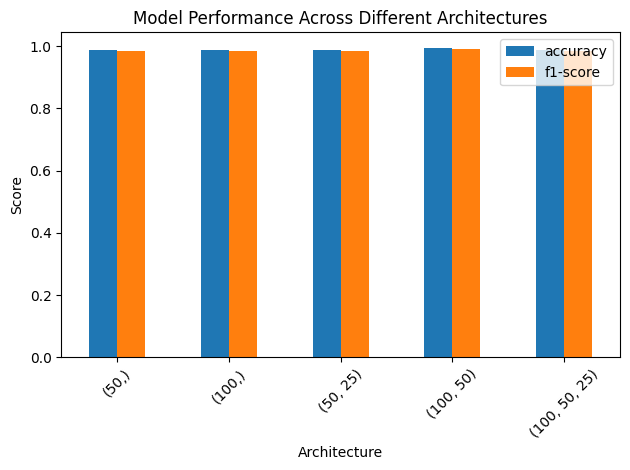


Detailed Results:
    architecture  accuracy  f1-score
0          (50,)  0.989071  0.984375
1         (100,)  0.989071  0.984375
2       (50, 25)  0.989071  0.984252
3      (100, 50)  0.994536  0.992188
4  (100, 50, 25)  0.989071  0.984496


In [31]:
# Test different neural network architectures
architectures = [
    (50,),           # Single hidden layer with 50 neurons
    (100,),          # Single hidden layer with 100 neurons
    (50, 25),        # Two hidden layers with 50 and 25 neurons
    (100, 50),       # Two hidden layers with 100 and 50 neurons
    (100, 50, 25)    # Three hidden layers
]

results = []
for arch in architectures:
    mlp = MLPClassifier(hidden_layer_sizes=arch, max_iter=1000, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    y_pred = mlp.predict(X_test_scaled)
    score = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'architecture': str(arch),
        'accuracy': score['accuracy'],
        'f1-score': score['1']['f1-score']
    })

# Plot architecture comparison
results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
results_df.plot(x='architecture', y=['accuracy', 'f1-score'], kind='bar')
plt.title('Model Performance Across Different Architectures')
plt.xlabel('Architecture')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
print(results_df)

______
## **Conclusion**
In this notebook, we've:
1. Implemented both single-layer and multi-layer perceptrons for weather classification
2. Analyzed the performance of different neural network architectures
3. Identified the most important features for predicting extreme weather
4. Compared the effectiveness of different approaches

The results show how neural networks can be used to classify weather conditions, with the multi-layer perceptron generally providing better performance for complex patterns in the data.